## Hypothesis 2:
*The ONE_POINT and TWO_POINT crossover methods do not differ much in terms of fitness when the color is optimized i.e. setting optimize_color=True and using any of the 3 optimize_color_methods. This is because the two crossover methods do not focus on evolving the coordinate of each gene. In other words, the shape representation of the image.*

## Setup

In [1]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE, REFERENCE_IMAGE_MONDRIAAN, REFERENCE_IMAGE_DONALD, REFERENCE_IMAGE_CITY
from vangogh.evaluation import *
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = True

def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")

def run_algorithm(settings):
    ref_image, seed, population_size, crossover_method, num_points, initialization, optimize_color_method, generation_budget, run = settings
    start = time()

    data = []
    evo = Evolution(num_points,
                    reference_image=ref_image,
                    image_name = ref_image.name,
                    population_size=population_size,
                    generation_reporter=reporter,
                    crossover_method=crossover_method,
                    seed=seed,
                    initialization=initialization,
                    generation_budget=generation_budget,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_2',
                    optimize_color=optimize_color_method != 'NONE',
                    optimize_color_method=optimize_color_method,
                    verbose=verbose_output)
    data = evo.run(run)
    time_spent = time() - start
    print(f"Done: run {run} - pop {population_size} - crossover {crossover_method} - num. points {num_points} - initialization {initialization} - in {int(time_spent)} seconds")

    return data

ALL_OC_METHODS = ('NONE', 'COORD', 'DOMINANT','AVERAGE') # constant, pick from this for oc_methods
initialization_methods = ('RANDOM', 'PICK_SINGLE_COORD_COLOR', 'PICK_AVERAGE_CELL_COLOR', 'PICK_DOMINANT_COLOR')
oc_methods = ('COORD', 'DOMINANT','AVERAGE', 'NONE')
crossover_methods = ('ONE_POINT', 'TWO_POINT')
generation_budget = 500
p_sizes = (100,)
runs = 10
# p_sizes = (50,)
# runs = 1
# generation_budget = 10
n_points = 100

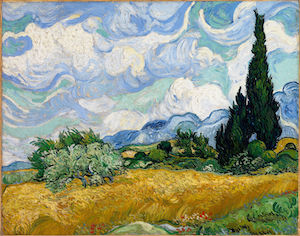

In [4]:
display(REFERENCE_IMAGE)

## Experiments

### Runs

#### Optimize Color = COORD

In [6]:
%%time


data0 = []
for run in range(runs):
    for population_size in p_sizes:
        for crossover_method in crossover_methods:
            seed = int(time())
            print(f"Running experiment for {crossover_method} crossover and optimize_color_method = {oc_methods[0]}")
            data0.extend(run_algorithm((REFERENCE_IMAGE, seed, population_size, crossover_method, n_points, 'PICK_AVERAGE_CELL_COLOR', oc_methods[0],
                                                generation_budget, run)))
df = pd.DataFrame(data0)
df["time-elapsed"] = df["time-elapsed"].round(0)
df.to_csv(f"testing0.csv", index=False)

Running experiment for ONE_POINT crossover and optimize_color_method = COORD
Initializing population
Done initializing population.


KeyboardInterrupt: 

#### Optimize Color = DOMINANT

In [8]:
%%time

# Running experiment for hypothesis 2
# optimize_color_method is set to DOMINANT


data1 = []
for run in range(runs):
    for population_size in p_sizes:
        for crossover_method in crossover_methods:
            seed = int(time())
            print(f"Running experiment for {crossover_method} crossover and optimize_color_method = {oc_methods[1]}")
            data1.extend(run_algorithm((REFERENCE_IMAGE, seed, population_size, crossover_method, n_points, 'PICK_AVERAGE_CELL_COLOR', oc_methods[1],
                                                   generation_budget, run)))

df = pd.DataFrame(data1)
df["time-elapsed"] = df["time-elapsed"].round(0)
df.to_csv("testing1.csv", index=False)

#### Optimize Color = AVERAGE

In [9]:
%%time

# Running experiment for hypothesis 2
# optimize_color_method is set to AVERAGE


data2 = []
for run in range(runs):
    for population_size in p_sizes:
        for crossover_method in crossover_methods:
            seed = int(time())
            print(f"Running experiment for {crossover_method} crossover and optimize_color_method = {oc_methods[2]}")
            data2.extend(run_algorithm((REFERENCE_IMAGE, seed, population_size, crossover_method, n_points, 'PICK_AVERAGE_CELL_COLOR', oc_methods[2],
                                                   generation_budget, run)))


df = pd.DataFrame(data2)
df["time-elapsed"] = df["time-elapsed"].round(0)
df.to_csv("testing2.csv", index=False)

#### Optimize Color = NONE

In [10]:
%%time

# Running experiment for hypothesis 2
# optimize_color_method is set to NONE


data3 = []
for run in range(runs):
    for population_size in p_sizes:
        for crossover_method in crossover_methods:
            seed = int(time())
            print(f"Running experiment for {crossover_method} crossover and optimize_color_method = {oc_methods[3]}")
            data3.extend(run_algorithm((REFERENCE_IMAGE, seed, population_size, crossover_method, n_points, 'PICK_AVERAGE_CELL_COLOR', oc_methods[3],
                                                   generation_budget, run)))


df = pd.DataFrame(data3)
df["time-elapsed"] = df["time-elapsed"].round(0)
df.to_csv("testing3.csv", index=False)

Running experiment for ONE_POINT crossover and optimize_color_method = NONE
Initializing population
Done initializing population.
generation: 1 best fitness: 38900 avg. fitness: 41443.68
generation: 2 best fitness: 38900 avg. fitness: 41641.54
generation: 3 best fitness: 38900 avg. fitness: 41438.9
generation: 4 best fitness: 38900 avg. fitness: 41630.37
generation: 5 best fitness: 38900 avg. fitness: 41556.56
generation: 6 best fitness: 38900 avg. fitness: 41489.98
generation: 7 best fitness: 38841 avg. fitness: 41392.7
generation: 8 best fitness: 38841 avg. fitness: 41257.76
generation: 9 best fitness: 38841 avg. fitness: 41158.29
generation: 10 best fitness: 38841 avg. fitness: 41103.76
generation: 11 best fitness: 38841 avg. fitness: 40910.31
generation: 12 best fitness: 38841 avg. fitness: 40946.22
generation: 13 best fitness: 38841 avg. fitness: 40972.44
generation: 14 best fitness: 38447 avg. fitness: 40819.45
generation: 15 best fitness: 38391 avg. fitness: 40795.16
generation:

### Combine Data

In [6]:
# Put all created csv files in one dataframe for plotting
df1 = pd.read_csv('testing0.csv')
df2 = pd.read_csv('testing1.csv')
df3 = pd.read_csv('testing2.csv')
df4 = pd.read_csv('testing3.csv')
df = pd.concat([df1, df2, df3, df4])
df.to_csv("total.csv")

## Visualisations

Plots showing the best-fitness per generation, averaged over several runs


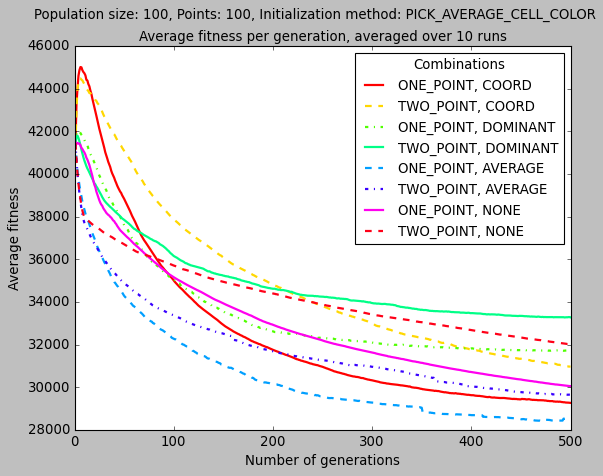

Plots showing the best-fitness per generation, averaged over several runs


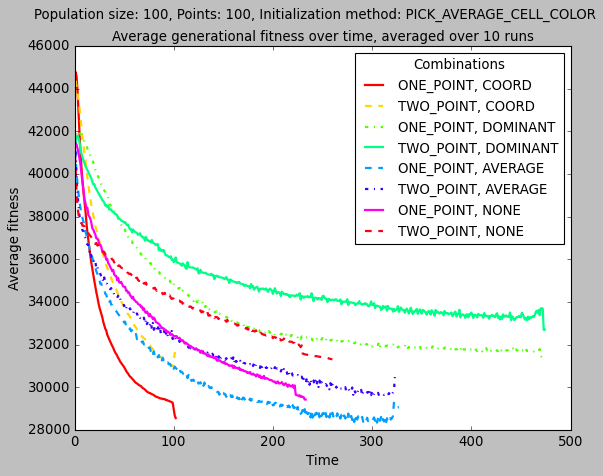

Plots showing the average best-fitness over several runs


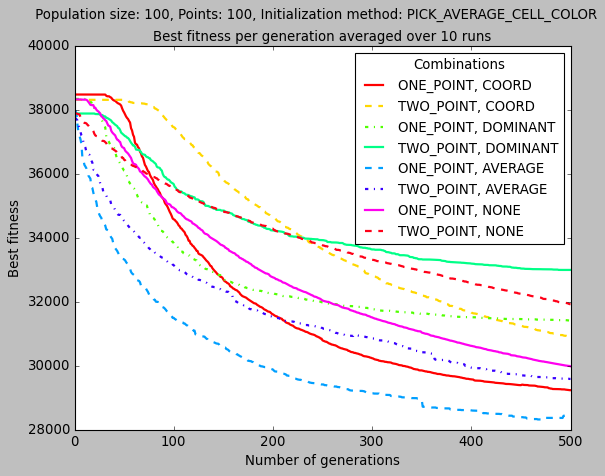

Plots showing the best-fitness over time, averaged over several runs


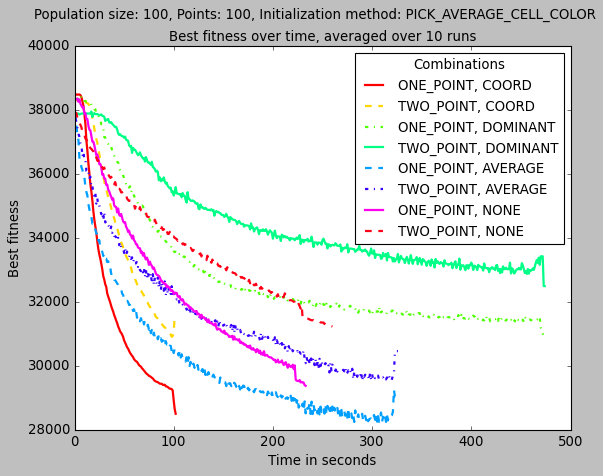

In [2]:
# your plotting code here...

df = pd.read_csv('total.csv')

for pop in p_sizes:
    plot_avg_gens(df, pop, n_points, 'avg', True)
    plot_avg_time(df, pop, n_points, "avg", True)
    plot_avg_best_fitness(df, pop, n_points, True)
    plot_best_fitness_time(df, pop, n_points, True)

## Running best settings in Hypothesis 2 for different reference images

### Run

In [3]:
%%time

# Running the settings on 4 images
images = (REFERENCE_IMAGE, REFERENCE_IMAGE_MONDRIAAN, REFERENCE_IMAGE_DONALD, REFERENCE_IMAGE_CITY)
data = []
for image in images:
    for population_size in p_sizes:
        for oc_method in oc_methods:
            seed = int(time())
            print(f"Running experiment for ONE_POINT crossover and optimize_color_method = {oc_method}")
            data.extend(run_algorithm((image, seed, population_size, 'ONE_POINT', n_points, 'PICK_AVERAGE_CELL_COLOR', oc_method,
                                                   generation_budget, 0)))
df = pd.DataFrame(data)
df["time-elapsed"] = df["time-elapsed"].round(0)
df.to_csv("all_images.csv", index=False)

Running experiment for ONE_POINT crossover and optimize_color_method = COORD
Initializing population
Done initializing population.
generation: 1 best fitness: 37540 avg. fitness: 41499.94
generation: 2 best fitness: 37540 avg. fitness: 42780.38
generation: 3 best fitness: 37540 avg. fitness: 43587.12
generation: 4 best fitness: 37540 avg. fitness: 44053.31


KeyboardInterrupt: 

### Plot

Plots showing the best-fitness per generation, averaged over several runs


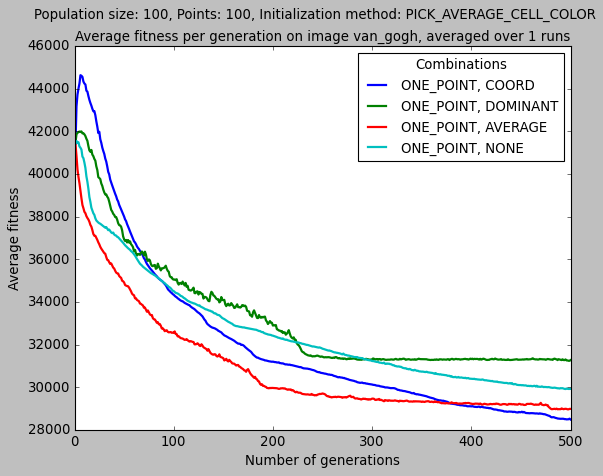

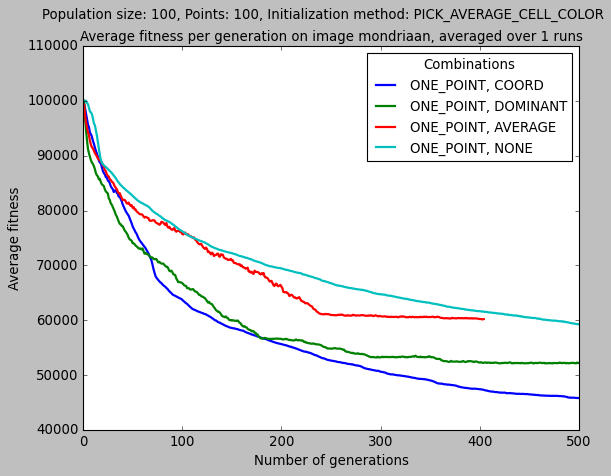

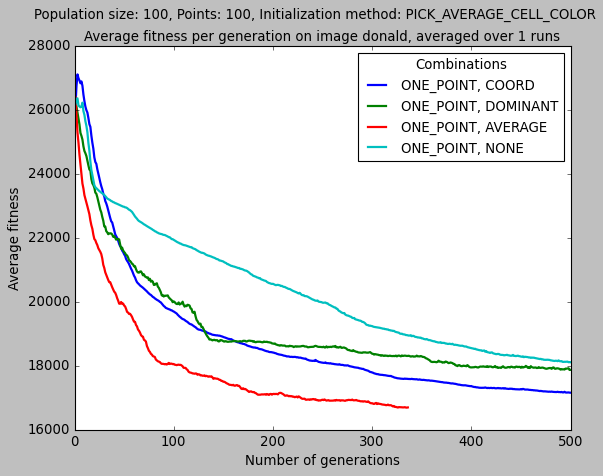

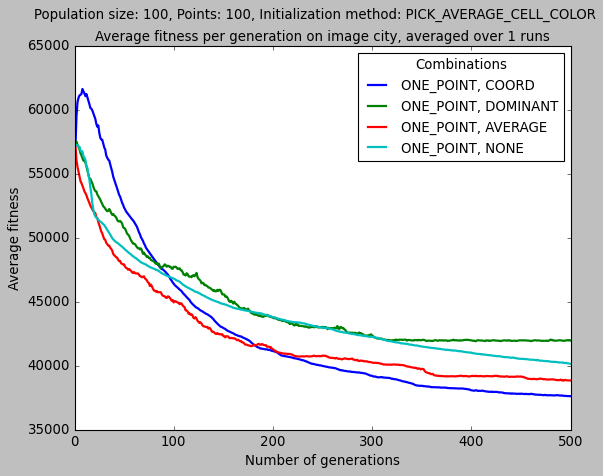

In [2]:
# Plotting performance of all images
df = pd.read_csv('all_images.csv')
plot_avg_gens_mult(df, 100, n_points, True)